<a href="https://www.kaggle.com/madhuri15/pandas-groupby-method-for-data-analysis?scriptVersionId=88446937" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Pandas Groupby() Method

In data analysis, we often would need our data to be analyzed by some categories or set of categories. In SQL, `GROUP BY`  statement is used which allows you to separate data  into groups, which can be aggregated independently of one another, for SQL you can use the following code:

```sql
SELECT column_1, column_2, SUM(column_3)
FROM table_1
GROUP BY column_1, column_2;
``` 

    
In Pandas, SQL's `GROUP BY` operation is performed using the similarly named `groupby()` method. Pandas `groupby()` method allows us to split data into groups to computing operations for better analysis. This is also called a **transformation process** since we separate our data into groups and apply a function that converts or transforms the data in some way depending on groups.
    
# The groupby process: split-apply-combine

By 'group by' we are referring to a process involving one or more of the following steps:
> * **splitting** the data into groups based on some criteria.
> * **Applying** a function to each group independently.
> * **Combining** the results into a data structure.

Out of these, the split step is the most straightforward. It splits the data into groups, In the next step, we apply a function to groups. It can be any one of the following.
* **Aggregation**: Compute a summary statistic(or statistics) for each group. for example: 
    - compute group sums or means
    - compute group sizes/counts

* **Transformation**: perform some group-specific computations and return a like-indexed object. for examples
    - Standardize data(zscore) within a group.
    - Filling NAs within groups with a value derived from each group.

* **Filtration**: discard some groups, according to group-wise computation that evaluates True or False. for examples:
    - Discard data that belongs to groups with only a few members.
    - Filter out data based on the group sum or mean.

## pd.groupby() Method
This is a syntax of Pandas `groupby()` method which includes only most frequently used parameters.
### syntax:

`DataFrame.groupby(by=None, axis=0, level=None, as_index=True, sort=True, dropna=True)`

**Parameters:**
* **by: mapping, function, label, or list of labels** 
    - it can be columns or index labels.
* **axis: {0 or *'index'*, 1 or *'columns'*}, default = 0**
    - split along rows(0) or columns(1)
* **level: int, level name, or sequence of such, default *None***
    - If the axis is a multi-index(hierarchical), group by a particular level or levels.
* **as_index: bool, default=True**
    - for aggregated output, return object with group lables as the index.
* **sort: bool, default=True**
    - sort group keys.
* **dropna: bool, default=True**
    - If ***True***, and if group keys contain NA values, NA values together with row/column will be dropped. If ***False***, NA values will also be treated as the key in groups.
    
Let's first load data and view first few rows of data.

In [1]:
# Importing libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("../input/students-performance-in-exams/StudentsPerformance.csv")

# Replacing space in column names with '_'
for col in data.columns:
    data.rename(columns={col: col.replace(" ", '_')}, inplace=True)
    
# prints first five rows
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



# What is Pandas `groupby()`?
Pandas `groupby()` methods split data to analyze it into groups by some categories. These categories can be simply a mapping of one or more labels (index or columns). In our example, let's first use the single *gender* column.

In [2]:
 group = data.groupby(by='gender')


In the above code, we create a groupby object which divides our data into different `gender` values. By calling `type()` function on result, we can see that it returns a `DataFrameGroupBy` Object.

In [3]:
type(group)

pandas.core.groupby.generic.DataFrameGroupBy

The `groupby()` function return a **DataFrameGroupBy** object that contains information about groups. To analyze how the dataframe is divided into groups of rows, we can use attributes and methods of the **DataFrameGroupBy** object.


* **ngroups:**
The `ngroups` attribute will return the number of groups.


In [4]:
group.ngroups

2

    
* **groups:**
The `groups` attribute is used to get the information of groups.

In [5]:
group.groups

{'female': [0, 1, 2, 5, 6, 9, 12, 14, 15, 17, 19, 21, 23, 27, 29, 30, 31, 32, 36, 37, 38, 41, 42, 44, 46, 47, 48, 54, 55, 56, 59, 63, 64, 67, 69, 70, 72, 78, 79, 80, 85, 86, 87, 88, 89, 90, 94, 97, 98, 99, 102, 105, 106, 108, 109, 110, 113, 114, 116, 117, 118, 119, 120, 122, 125, 129, 133, 138, 140, 141, 142, 145, 148, 152, 155, 156, 158, 161, 164, 165, 167, 168, 169, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183, 189, 190, 192, 194, 198, 199, ...], 'male': [3, 4, 7, 8, 10, 11, 13, 16, 18, 20, 22, 24, 25, 26, 28, 33, 34, 35, 39, 40, 43, 45, 49, 50, 51, 52, 53, 57, 58, 60, 61, 62, 65, 66, 68, 71, 73, 74, 75, 76, 77, 81, 82, 83, 84, 91, 92, 93, 95, 96, 100, 101, 103, 104, 107, 111, 112, 115, 121, 123, 124, 126, 127, 128, 130, 131, 132, 134, 135, 136, 137, 139, 143, 144, 146, 147, 149, 150, 151, 153, 154, 157, 159, 160, 162, 163, 166, 170, 171, 180, 184, 185, 186, 187, 188, 191, 193, 195, 196, 197, ...]}

    
We can see each group is listed and specifies the rows of the dataframe assigned to each group.

* **size():** **size()** will return size of each groups. It returns a Series whose index are the group names and values are the size of each group. This is same as **value_counts()** function of DataFrame/Series.

In [6]:
group.size()

gender
female    518
male      482
dtype: int64

# Selecting a group

You can use the `get_group()` method to select a particular group. Since the group object's return type is DataFrame/Series type so, you can use attributes and functions of DataFrame or Series on the result.

In [7]:
group.get_group('female').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92



The output shows the data with gender value `female` only.

# Data Aggregation

After creating the **DataFrameGroupBy** object, you can apply the operation to the grouped data. Data aggregation is the transformation that produces a single integer from an array. Any function that returns a single scalar value is an **aggregate function**. 

for example: Computing a summary statistic (or statistics) for each group using sum(), std(), mean(), min(), max(), size() or counts(), etc.

You can perform aggregation on a particular column or if a column is not specified then the computation is applied to all numeric columns.

In [8]:
group = data.groupby(by='gender')
group['math_score'].sum()

gender
female    32962
male      33127
Name: math_score, dtype: int64

In [9]:
group.mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


After an operation of aggregation, the names of some columns may not be meaningful. It is often useful to add a prefix to the column name that describes the aggregate values. `add_prefix()` function helps to add prefixes on grouped data column names as follows.

In [10]:
group.mean().add_prefix('mean_')

,mean_math_score,mean_reading_score,mean_writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


    
Very often the two phases of grouping and application of the function/s are performed in a single step as follows:


In [11]:
data.groupby(by=['gender'])['math_score'].mean()

gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64

## `agg()` method

`agg()` or equivalent `aggregate()` method of a grouped object allows you to compute single or multiple aggregation functions at once. 


In [12]:
data.groupby(by=['lunch'])['math_score'].agg(['count', 'std', np.mean])

,count,std,mean
lunch,,,
free/reduced,355,15.159956,58.921127
standard,645,13.653501,70.034109


`agg()` function also support user-defined functions.

In [13]:
# using lambda function
data.groupby(by=['lunch'])['reading_score'].agg([lambda x: x.median() - x.mean(), lambda x: x.std()])

,<lambda_0>,<lambda_1>
lunch,,
free/reduced,0.346479,14.895339
standard,0.345736,13.830602


In [14]:
# using user define function
def diff(x):
    return x.max() - x.min()

data.groupby(by='gender')['writing_score'].aggregate(diff)

gender
female    90
male      85
Name: writing_score, dtype: int64

## Named aggregation
Pandas support column-specific aggregation with control over the column name in the `agg()` function

In [15]:
data.groupby(by='gender')['reading_score'].agg(
                               min_score = 'min', 
                               max_score = 'max',)

,min_score,max_score
gender,,
female,17,100
male,23,100


We can apply different functions to the columns of a DataFrame by passing a dictionary to the `agg()` function.


In [16]:
# create a groupby object - grouped
grouped = data.groupby('gender')
grouped.agg({'math_score':[np.std, np.mean], 'reading_score':np.mean})

math_score            reading_score
              std       mean          mean
gender                                    
female  15.491453  63.633205     72.608108
male    14.356277  68.728216     65.473029

 
# Transformation
Transformation is some group-specific computations and returns a like-indexed object with the same size of input data.
Let's standardize data(zscore) within a group using `transform()` method.

In [17]:
# creating a function
Zscore = lambda x:(x - x.mean())/x.std()

# To standardize the `writing score` column using transform function.
data.groupby(by=['lunch'])['writing_score'].transform(Zscore)

0      0.221538
1      1.197863
2      1.546551
3     -1.232523
4      0.291276
         ...   
995    1.686026
996   -0.519802
997    0.128125
998    0.430751
999    1.488773
Name: writing_score, Length: 1000, dtype: float64

You can also use the `apply` function which produces the same output as above. 

In [18]:
# using apply() function
data.groupby(by=['lunch'])['writing_score'].apply(Zscore)

0      0.221538
1      1.197863
2      1.546551
3     -1.232523
4      0.291276
         ...   
995    1.686026
996   -0.519802
997    0.128125
998    0.430751
999    1.488773
Name: writing_score, Length: 1000, dtype: float64

# Filtration
The filter method returns a subset of the original DataFrame. Filtration discard some groups, according to a group-wise computation that evaluates True or False.

The argument of the filter must be a function that, applied to the group as a whole, return True or False. Let's group the data by "parental level of education" and look for the size of each group using **size()** method of **DataFrameGroupBy** Object.

In [19]:
data.groupby("parental_level_of_education").size()

parental_level_of_education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
dtype: int64

Now, let's filter out data to return all students whose parental level of education is **associate's degree**. For that, we use **filter()** method with lambda function.

In [20]:
data.groupby("parental_level_of_education").filter(lambda x: len(x) == 222)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
3,male,group A,associate's degree,free/reduced,none,47,57,44
5,female,group B,associate's degree,standard,none,71,83,78
10,male,group C,associate's degree,standard,none,58,54,52
11,male,group D,associate's degree,standard,none,40,52,43
19,female,group C,associate's degree,free/reduced,none,54,58,61
...,...,...,...,...,...,...,...,...
968,female,group E,associate's degree,standard,none,68,76,67
977,male,group C,associate's degree,standard,none,62,65,58
979,female,group C,associate's degree,standard,none,91,95,94
986,female,group C,associate's degree,standard,none,40,59,51


# Grouping by multiple categories.
## 1. Multiple columns

So far, we grouped our data using single columns. But grouping can be done with multiple columns.

In [21]:
# Grouped data by multiple columns.
group = data.groupby(by=['gender', 'test_preparation_course'])
grouped = group['writing_score'].mean()
pd.DataFrame(grouped)

writing_score
gender test_preparation_course               
female completed                    78.793478
       none                         68.982036
male   completed                    69.793103
       none                         59.649351


We can use the result of grouped data to visualized the values for better analysis

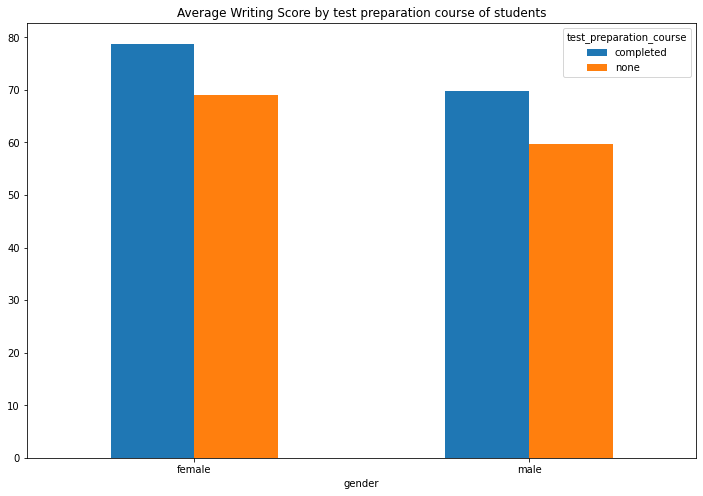

In [22]:
# Bar plot of grouped data.
grouped.unstack().plot(kind='bar', figsize=(12, 8))
plt.title('Average Writing Score by test preparation course of students')
plt.xticks(rotation=0)
plt.show()

## 2. Combination of columns and index
A DataFrame may be grouped by a combination of columns and index levels by specifying the column names as strings and the index levels as pd.Grouper objects.
    

In [23]:
# Creating multi-index dataframe
arrays = [['a', 'b', 'a'], ['one', 'two', 'one']]
index = pd.MultiIndex.from_arrays(arrays=arrays, names=['first', 'second'])
df = pd.DataFrame({'A':[1, 1, 1], 'B':np.arange(3)}, index=index)
df

,,A,B
first,second,,
a,one,1,0
b,two,1,1
a,one,1,2


In [24]:
# Let's groupby by dataframe df by second index level and the A column
df.groupby([pd.Grouper(level=1), 'A']).sum()

,,B
second,A,
one,1,2
two,1,1


Or directly specifying the index level names as key to the groupby method.

In [25]:
df.groupby(['second', 'A']).sum()

,,B
second,A,
one,1,2
two,1,1


# GroupBy Sorting
By default, the group keys(index of a group) are sorted during the `groupby()` operation. You can pass `sort=False` to get the unsorted grouped data.

In [26]:
lists = [[2, 2, 3], [None, 2, 3], [2, 1, 4], [1, 2, 3]]
df = pd.DataFrame(lists, columns=['A', 'B', 'C'])
df

,A,B,C
0,2.0,2,3
1,NaN,2,3
2,2.0,1,4
3,1.0,2,3


In [27]:
df.groupby(by=['A'])['B'].max()

A
1.0    2
2.0    2
Name: B, dtype: int64

In [28]:
df.groupby(by=['A'], sort=False)['B'].max()

A
2.0    2
1.0    2
Name: B, dtype: int64

# GroupBy dropna
By default `NA` values are excluded from group keys during the groupby operation. However, sometimes we need to analyze the `Null` values in group keys, to include NA values in group keys you could pass `dropna=False`, The default setting of `dropna` is `True`.

In [29]:
df.groupby(by=['A']).sum()

,B,C
A,,
1.0,2,3
2.0,3,7


In [30]:
df.groupby(by=['A'], dropna=False).sum()

,B,C
A,,
1.0,2,3
2.0,3,7
NaN,2,3


# Resetting index with as_index

The result of aggregation on grouping by multiple columns or levels will result in a MultiIndex DataFrame. This can be changed by using `as_index=False` into a zero-based dataframe object.

In [31]:
df

,A,B,C
0,2.0,2,3
1,NaN,2,3
2,2.0,1,4
3,1.0,2,3


In [32]:
df.groupby(by=['A']).sum()

,B,C
A,,
1.0,2,3
2.0,3,7


In [33]:
df.groupby(by=['A'], as_index=False).sum()

,A,B,C
0,1.0,2,3
1,2.0,3,7


The same can be achieved using the `reset_index` dataframe function.

In [34]:
df.groupby(by=['A']).sum().reset_index()

,A,B,C
0,1.0,2,3
1,2.0,3,7


# Conclusion
Pandas provide one of the most powerful and flexible groupby functionality for both aggregating and transforming data for better analysis and visualization. I hope this article will help you to learn about Pandas. I recommend you to check out its [documentation](https://pandas.pydata.org/docs/user_guide/groupby.html#splitting-an-object-into-groups) to know more about the groupby() method. 

Thanks for reading.

# References
* [1] **Pandas Official Tutorial**: [Group_by:split-apply-combine](https://pandas.pydata.org/docs/user_guide/groupby.html#splitting-an-object-into-groups)
